# Example 02

$$\max Z = 2x_1 + 3x_2 $$

\begin{align}
x_1 + x_2 & \leq 30\\
x_2 & \geq 3\\
x_2 & \leq 12\\
x_1 - x_2 & \geq 0\\
x_1 & \leq 20\\[3mm]
x_1, x_2 & \geq 0
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 200, 100)

In [3]:
eq1 = 30 - x   # x2 <= 30 - x1
eq2 = 3        # x2 >= 3
eq3 = 12       # x2 <= 12
eq4 = x        # x2 <= x1
eq5 = 20       # x1 <= 20

In [4]:
zeq = lambda x1, z: (z - 2*x1)/3    #  x2 = (Z - 2x1)/3

### Plot

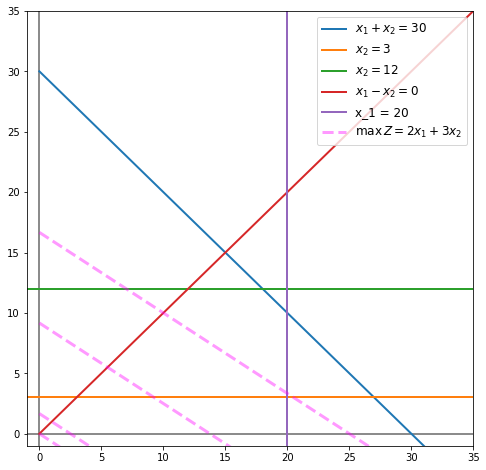

In [6]:
plt.figure(figsize=(8,8))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# plot x, f(x)
plt.plot(x, eq1, lw=2, label=r"$x_1 + x_2 = 30$")
plt.plot([-5, 100], [eq2, eq2], lw=2, label=r"$x_2 = 3$")
plt.plot([-5, 100], [eq3, eq3], lw=2, label=r"$x_2 = 12$")
plt.plot(x, eq4, lw=2, label=r"$x_1 -x_2 = 0$")
plt.plot([eq5, eq5], [-10, 100], lw=2, label=r"x_1 = 20")

plt.plot(x, zeq(x, 0), color="magenta", lw=3, ls="--", alpha=0.4, label=r"$\max\, Z = 2x_1 + 3x_2$")
for i in np.linspace(5, 50, 3):
    plt.plot(x, zeq(x, i), color="magenta", lw=3, ls="--", alpha=0.4)
    
plt.xlim(-1, 35)
plt.ylim(-1,35)
plt.legend(fontsize=12, loc="upper right")
plt.show()

In [7]:
A = np.array([
    [1,  1],   # blue     [0]
    [0,  1],   # orange   [1]
    [0,  1],   # green    [2]
    [1, -1],   # red      [3]
    [1,  0],   # purple   [4]
])

In [8]:
print(A)

[[ 1  1]
 [ 0  1]
 [ 0  1]
 [ 1 -1]
 [ 1  0]]


In [9]:
b = np.array([30, 
              3, 
              12, 
              0, 
              20,
             ])

In [10]:
# intersections
equations_index = [(1, 3),  # orange, red
                   (2, 3),  # green, red
                   (0, 2),  # blue, green
                   (0, 4),  # blue, purple
                   (1, 4),  # orange, purple
                  ]

In [11]:
points = [np.linalg.solve(A[list(i)], b[list(i)]) for i in equations_index]
print(points)

[array([3., 3.]), array([12., 12.]), array([18., 12.]), array([20., 10.]), array([20.,  3.])]


In [12]:
coordinates = list(zip(*points))
print(coordinates)

[(3.0, 12.0, 18.0, 20.0, 20.0), (3.0, 12.0, 12.0, 10.0, 3.0)]


In [13]:
zvalues = [2*x1 + 3*x2 for x1, x2 in points]
print(zvalues)

[15.0, 60.0, 72.0, 70.0, 49.0]


In [14]:
best_index, best_value = max(enumerate(zvalues), key=lambda t:t[1])
print(best_index, best_value)

2 72.0


In [15]:
best_point = points[best_index]
print(best_point)

[18. 12.]


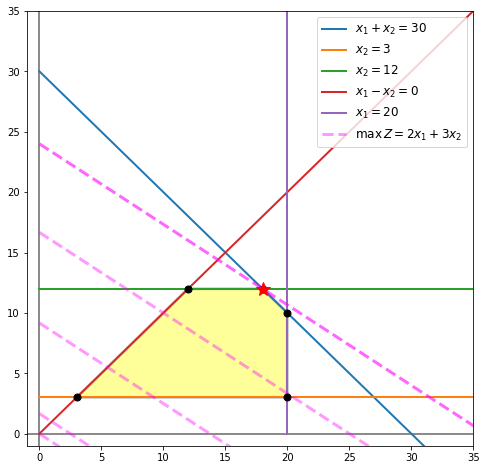

In [17]:
plt.figure(figsize=(8, 8))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")

plt.plot(x, eq1, lw=2, label=r"$x_1 + x_2 = 30$")
plt.plot([0, 100], [eq2, eq2], lw=2, label=r"$x_2 = 3$")
plt.plot([0, 100], [eq3, eq3], lw=2, label=r"$x_2 = 12$")
plt.plot(x, eq4, lw=2, label=r"$x_1 -x_2 = 0$")
plt.plot([eq5, eq5], [0, 100], lw=2, label=r"$x_1 = 20$")

plt.plot(x, zeq(x, 0), color="magenta", lw=3, ls="--", alpha=0.4, label=r"$\max\, Z = 2x_1 + 3x_2$")
for i in np.linspace(5, 50, 3):
    plt.plot(x, zeq(x, i), color="magenta", lw=3, ls="--", alpha=0.4)
    
plt.plot(x, zeq(x, best_value), lw=3, color="magenta", ls="--", alpha=0.6)

for point in points:
    plt.plot(*point, ms=7, marker="o", color="k")
plt.plot(*best_point, ms=15, marker="*", color="red")

plt.fill(*coordinates, facecolor="yellow", edgecolor="gray", lw=3, alpha=0.4)

plt.xlim(-1, 35)
plt.ylim(-1, 35)
plt.legend(fontsize=12, loc="upper right")
plt.show()